# QuickDraw classification using feedforward network

In [1]:
%matplotlib inline

import glob
import matplotlib
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import imageio as im
from keras import models
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ModelCheckpoint

Using TensorFlow backend.


## Load the data

In [2]:
flamingo = np.load('flamingo.npy')
fish = np.load('fish.npy')
bear = np.load('bear.npy')
butterfly = np.load('butterfly.npy')
apple = np.load('apple.npy')
airplane = np.load('airplane.npy')

## Add label to the data

In [3]:
# add a column with labels, 0=flamingo, 1=fish
flamingo = np.c_[flamingo, np.zeros(len(flamingo))]
fish = np.c_[fish, np.ones(len(fish))]
bear = np.c_[bear, 2*np.ones(len(bear))]
butterfly = np.c_[butterfly, 3*np.ones(len(butterfly))]
apple = np.c_[apple, 4*np.ones(len(apple))]
airplane = np.c_[airplane, 5*np.ones(len(airplane))]

# store the label codes in a dictionary
label_dict = {0:'flamingo', 1:'fish', 2:'bear', 3:'butterfly', 4:'apple', 5:'airplane'}

print(flamingo.shape)
print(fish.shape)
print(bear.shape)
print(butterfly.shape)
print(apple.shape)
print(airplane.shape)

(124569, 785)
(134150, 785)
(134762, 785)
(117999, 785)
(144722, 785)
(151623, 785)


## Visualize the data

In [4]:
def plot_samples(input_array, rows=4, cols=5, title=''):
    '''
    Function to plot 28x28 pixel drawings that are stored in a numpy array.
    Specify how many rows and cols of pictures to display (default 4x5).  
    If the array contains less images than subplots selected, surplus subplots remain empty.
    '''
    
    fig, ax = plt.subplots(figsize=(cols,rows))
    ax.axis('off')
    plt.title(title)

    for i in list(range(0, min(len(input_array),(rows*cols)) )):      
        a = fig.add_subplot(rows,cols,i+1)
        imgplot = plt.imshow(input_array[i,:784].reshape((28,28)), cmap='gray_r', interpolation='nearest')
        plt.xticks([])
        plt.yticks([])

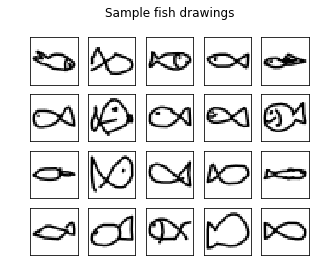

In [5]:
plot_samples(fish, title='Sample fish drawings\n')

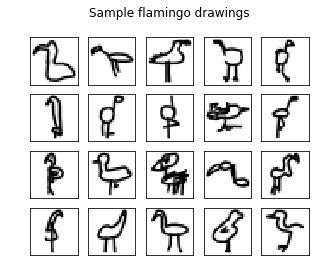

In [6]:
plot_samples(flamingo, title='Sample flamingo drawings\n')

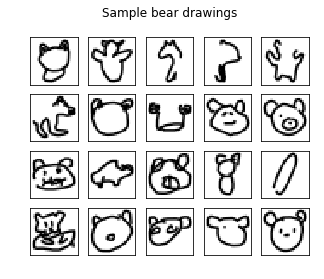

In [7]:
plot_samples(bear, title='Sample bear drawings\n')

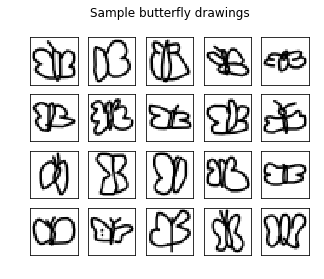

In [8]:
plot_samples(butterfly, title='Sample butterfly drawings\n')

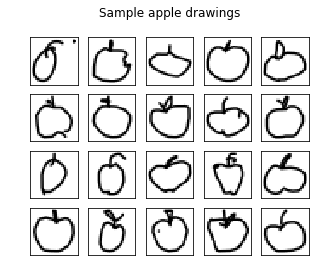

In [9]:
plot_samples(apple, title='Sample apple drawings\n')

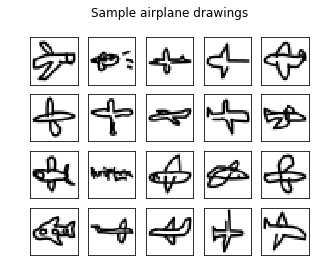

In [10]:
plot_samples(airplane, title='Sample airplane drawings\n')

## Split the training set and test set

In [11]:
from sklearn.model_selection import train_test_split

# merge the flamingo and fish arrays, and split the features (X) and labels (y). Convert to float32 to save some memory.
X = np.concatenate((flamingo[:5000,:-1], fish[:5000,:-1], bear[:5000,:-1], butterfly[:5000,:-1], apple[:5000,:-1], airplane[:5000,:-1]), axis=0).astype('float32') # all columns but the last
y = np.concatenate((flamingo[:5000,-1], fish[:5000,-1], bear[:5000,-1], butterfly[:5000,-1], apple[:5000,-1], airplane[:5000,-1]), axis=0).astype('float32') # the last column

# train/test split (divide by 255 to obtain normalized values between 0 and 1)
# I will use a 50:50 split, since I want to start by training the models on 5'000 samples and thus have plenty of samples to spare for testing.
X_train, X_test, y_train, y_test = train_test_split(X/255.,y,test_size=0.5,random_state=0)

In [12]:
from keras.utils import np_utils
# one hot encode outputs
y_train_cnn = np_utils.to_categorical(y_train)
y_test_cnn = np_utils.to_categorical(y_test)
num_classes = y_test_cnn.shape[1]

In [13]:
# reshape to be [samples][pixels][width][height]
X_train_cnn = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test_cnn = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

## Build the feedforward network

In [14]:
classifier = Sequential()

In [15]:
classifier.add(Flatten(input_shape = (28, 28, 1)))
classifier.add(Dense(units = 1024, activation = 'relu'))
classifier.add(Dropout(0.7))
classifier.add(Dense(units = 6, activation = 'softmax'))

In [16]:
classifier.compile(optimizer = 'adam',
                   loss = 'categorical_crossentropy', 
                   metrics = ['accuracy'])

## Train

In [17]:
# Fit the model
classifier.fit(X_train_cnn, y_train_cnn, validation_data=(X_test_cnn, y_test_cnn), epochs=20, batch_size=10)
# Final evaluation of the model

Train on 15000 samples, validate on 15000 samples
Epoch 1/20
15000/15000 [==============================] - 30s 2ms/step - loss: 0.7163 - acc: 0.7625 - val_loss: 0.5102 - val_acc: 0.8327
Epoch 2/20
15000/15000 [==============================] - 27s 2ms/step - loss: 0.5567 - acc: 0.8169 - val_loss: 0.4545 - val_acc: 0.8542
Epoch 3/20
15000/15000 [==============================] - 28s 2ms/step - loss: 0.5094 - acc: 0.8353 - val_loss: 0.4176 - val_acc: 0.8650
Epoch 4/20
15000/15000 [==============================] - 27s 2ms/step - loss: 0.4726 - acc: 0.8493 - val_loss: 0.4106 - val_acc: 0.8698
Epoch 5/20
15000/15000 [==============================] - 27s 2ms/step - loss: 0.4376 - acc: 0.8564 - val_loss: 0.4086 - val_acc: 0.8737
Epoch 6/20
15000/15000 [==============================] - 27s 2ms/step - loss: 0.4227 - acc: 0.8666 - val_loss: 0.3917 - val_acc: 0.8781
Epoch 7/20
15000/15000 [==============================] - 28s 2ms/step - loss: 0.3920 - acc: 0.8798 - val_loss: 0.4129 - val_acc

## Model summary

In [18]:
classifier.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              803840    
_________________________________________________________________
dropout_1 (Dropout)          (None, 1024)              0         
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 6150      
Total params: 809,990
Trainable params: 809,990
Non-trainable params: 0
_________________________________________________________________


## The effect of dropout

In [19]:
classifier_nodropout = Sequential()
classifier_nodropout.add(Flatten(input_shape = (28, 28, 1)))

classifier_nodropout.add(Dense(units = 1024, activation = 'relu'))
classifier_nodropout.add(Dense(units = 6, activation = 'softmax'))
classifier_nodropout.compile(optimizer = 'adam',
                   loss = 'categorical_crossentropy', 
                   metrics = ['accuracy'])

In [20]:
# Fit the model
classifier_nodropout.fit(X_train_cnn, y_train_cnn, validation_data=(X_test_cnn, y_test_cnn), epochs=20, batch_size=10)
# Final evaluation of the model

Train on 15000 samples, validate on 15000 samples
Epoch 1/20
15000/15000 [==============================] - 28s 2ms/step - loss: 0.5490 - acc: 0.8175 - val_loss: 0.4130 - val_acc: 0.8656
Epoch 2/20
15000/15000 [==============================] - 27s 2ms/step - loss: 0.3484 - acc: 0.8855 - val_loss: 0.4161 - val_acc: 0.8699
Epoch 3/20
15000/15000 [==============================] - 27s 2ms/step - loss: 0.2383 - acc: 0.9255 - val_loss: 0.3790 - val_acc: 0.8842
Epoch 4/20
15000/15000 [==============================] - 27s 2ms/step - loss: 0.1609 - acc: 0.9481 - val_loss: 0.3981 - val_acc: 0.8838
Epoch 5/20
15000/15000 [==============================] - 27s 2ms/step - loss: 0.1024 - acc: 0.9673 - val_loss: 0.4812 - val_acc: 0.8816
Epoch 6/20
15000/15000 [==============================] - 27s 2ms/step - loss: 0.0714 - acc: 0.9782 - val_loss: 0.5121 - val_acc: 0.8784
Epoch 7/20
15000/15000 [==============================] - 27s 2ms/step - loss: 0.0486 - acc: 0.9864 - val_loss: 0.5531 - val_acc